In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import pylab as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    if plot_support:
        # plot support vectors
        ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none', edgecolors='b');
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

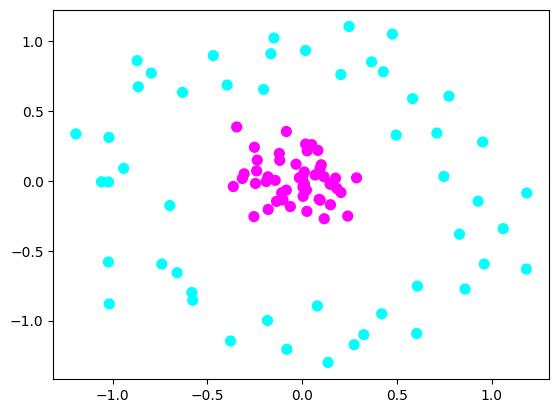

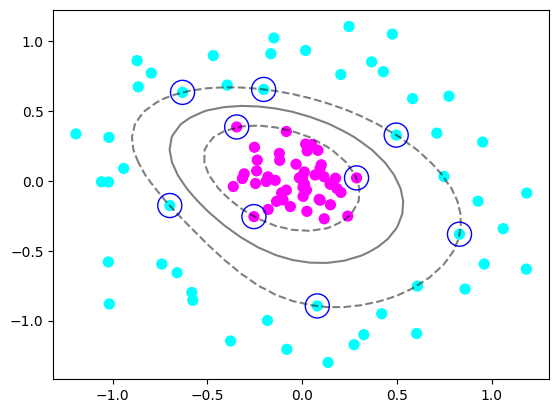

In [53]:
X, y = make_circles(100, factor=.1, noise=.15)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
SVM = SVC(kernel='rbf', C=100)
SVM.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(SVM, ax = ax)
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [46]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from skopt import BayesSearchCV


import time
start_time = time.time()

gs = BayesSearchCV(
    SVC(),
    {'C': (1e-1, 1e+2, 'log-uniform'),
     'gamma': (1e-1, 1e+2, 'log-uniform')},
    n_iter=15,
    cv=5)

gs = gs.fit(X, y)
print(gs.best_score_, gs.best_params_)
print("--- %s seconds ---" % (time.time() - start_time))

1.0 OrderedDict([('C', 0.39708379919166936), ('gamma', 2.8180524783413237)])
--- 12.984336376190186 seconds ---


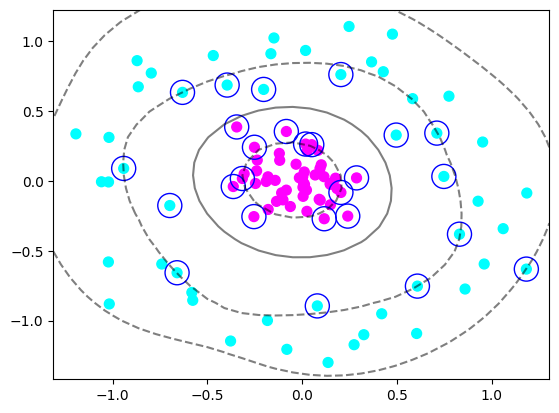

In [55]:
ParamsList = list(gs.best_params_.values())
SVM = SVC(kernel='rbf', C=ParamsList[0], gamma=ParamsList[1])
SVM.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='cool')
plot_svc_decision_function(SVM, ax = ax)
ax.scatter(SVM.support_vectors_[:, 0], SVM.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');